(150, 2)


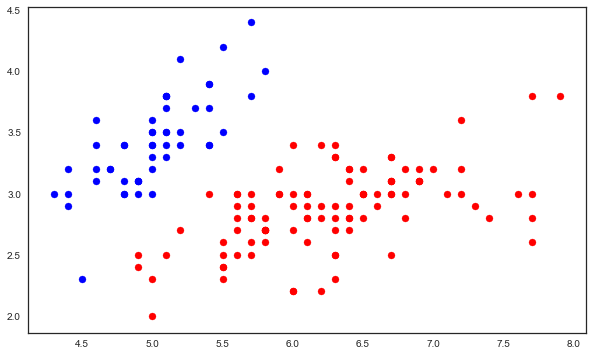

In [12]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
sns.set_style("white")

# Material Reference
# 1. https://taweihuang.hpd.io/2017/12/22/logreg101/
# 2. https://medium.com/@chih.sheng.huang821/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E7%BE%85%E5%90%89%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-aff7a830fb5d
# 3. https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-3%E8%AC%9B-%E7%B7%9A%E6%80%A7%E5%88%86%E9%A1%9E-%E9%82%8F%E8%BC%AF%E6%96%AF%E5%9B%9E%E6%AD%B8-logistic-regression-%E4%BB%8B%E7%B4%B9-a1a5f47017e5

iris = datasets.load_iris()
X = iris.data[:, :2]
Y =(iris.target != 0) *1

plt.figure(figsize=(10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color = 'b', label='0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'r', label='0')
#plt.legend()


In [51]:
class MyLogisticRegression:
    def __init__(self, lr, num_iter, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def addIntercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis = 1)
    
    def sigmoid(self, x):
        return 1.0/(1+np.exp(-x))
    
    def calculateLoss(self, h, y):
        return (-y*np.log(h) - (1-y)*np.log(1-h)).mean()
    
    def fit(self, X, Y):
        if self.fit_intercept:
            X = self.addIntercept(X)
            
        self.beta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            beta_x = np.dot(X, self.beta)
            pi = self.sigmoid(beta_x)
            gradient = np.dot(X.T, (pi-Y)) / Y.size # doing normalization
            self.beta = self.beta - self.lr * gradient
            
            # Check loss function
            z = np.dot(X, self.beta)
            h = self.sigmoid(z)
            loss = self.calculateLoss(h, Y)
            #print("iterration: {}, loss: {}".format(i, loss))
            
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.addIntercept(X)
            
        return self.sigmoid(np.dot(X, self.beta))
    
    def predict(self, X):
        return self.predict_prob(X).round()
    

In [52]:
model = MyLogisticRegression(0.05, 10000)
model.fit(X, Y)
Y_pred = model.predict(X)
print( (Y_pred == Y).mean())
print(model.beta)

0.9933333333333333
[-1.98333591  4.93907556 -7.93091391]


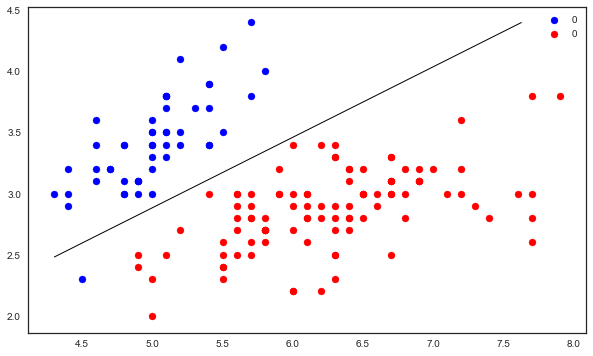

In [36]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color = 'b', label='0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'r', label='0')
plt.legend()
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [48]:
from sklearn.linear_model import LogisticRegression
sklearn_model = LogisticRegression(fit_intercept=True)
sklearn_model.fit(X,Y)
pred = model.predict(X)
Y_pred = model.predict(X)
print( (Y_pred == Y).mean())
print(sklearn_model.coef_, sklearn_model.intercept_)

0.9933333333333333
[[ 2.49579289 -4.01011301]] [-0.81713932]


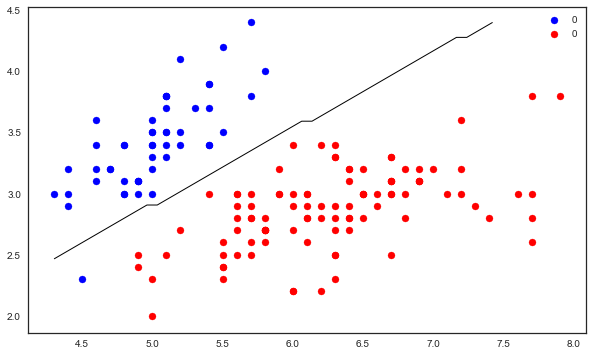

In [46]:
plt.figure(figsize=(10,6))
plt.scatter(X[Y==0][:,0], X[Y==0][:,1], color = 'b', label='0')
plt.scatter(X[Y==1][:,0], X[Y==1][:,1], color = 'r', label='0')
plt.legend()
x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = sklearn_model.predict(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');